# Importing packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("ggplot")
import pandas as pd
import random as rand
import string
import math
chars = string.ascii_uppercase + string.digits
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,8)
import seaborn as sns
import sklearn as skl
import skimage as ski
from sklearn.preprocessing import LabelEncoder
from scipy import spatial
from sklearn.utils import shuffle
from os import system
import skimage as ski
from skimage.color import rgb2gray
from scipy import misc
from skimage.exposure import adjust_gamma
from sklearn import preprocessing
from scipy import stats
from glob import glob

# importing and formating the tables

In [2]:
file1 = pd.read_csv('twelve.species.2017.ultimate.txt' , sep= "	")
file1['segmentSize']= file1['posterior']- file1['anterior']
file1.head()

species  larva segment  anterior  posterior  denticle.width  segmentSize
0    Dana      1      A1     31.23      32.82            1.59         1.59
1    Dana      1      A2     37.94      41.33            3.39         3.39
2    Dana      1      A3     45.86      49.07            3.21         3.21
3    Dana      1      A4     53.30      56.41            3.11         3.11
4    Dana      1      A5     60.60      63.74            3.14         3.14

In [3]:
file2 = pd.read_csv('twelve.species.2017.fullbodylength.txt', sep ='	')
file2.head()
file2[(file2.species == 'Dana')  & (file2.larva == 1)]['body.length'].values[0]

6081

In [4]:
populations = {}
for spe in file1.species.unique():
    populations[spe] = file1[file1.species == spe]
print(populations['Dana'].head())
species_list = list(populations.keys())
species_list = ['Dsim', 'Dsec', 'Dmel', 'Dyak', 'Dere', 'Dana','Dpse', 'Dper', 'Dwil', 'Dvir', 'Dmoj']
segments_names = populations['Dana'].segment.unique()

    

  species  larva segment  anterior  posterior  denticle.width  segmentSize
0    Dana      1      A1     31.23      32.82            1.59         1.59
1    Dana      1      A2     37.94      41.33            3.39         3.39
2    Dana      1      A3     45.86      49.07            3.21         3.21
3    Dana      1      A4     53.30      56.41            3.11         3.11
4    Dana      1      A5     60.60      63.74            3.14         3.14


## trying to organize the data and not failing anymore :)

In [5]:
%%time
newpop = {}
for spe in species_list:
    tmpDF = pd.DataFrame()
    for larva in populations[spe].larva.unique():
        tmpDF2 = pd.DataFrame()
        for seg in segments_names:
            afly = populations[spe][populations[spe].larva == larva]
            tmpDF2[seg] = pd.Series([afly[afly.segment == seg].segmentSize.values[0] * file2[(file2.species == spe)  & (file2.larva == larva)]['body.length'].values[0]])
            #tmpDF2['D.width'+seg] = pd.Series(afly[afly.segment == seg].segmentSize.values)
        tmpDF = pd.concat([tmpDF, tmpDF2])
    newpop[spe] = tmpDF.reset_index(drop=True)
    
    

CPU times: user 22.5 s, sys: 60.5 ms, total: 22.5 s
Wall time: 22.5 s


# calculating mean phenotype vector for each species

In [6]:
MeanPheVectorAllSpe = {}
for spe in species_list:
    MeanPheVectorAllSpe[spe] = newpop[spe].iloc[:, :].mean(axis=0)
MeanPheVectorAllSpe['Dvir']

A1     8158.720708
A2    18946.169469
A3    19426.665929
A4    19752.985398
A5    21302.366195
A6    21194.875841
A7    19891.746991
A8    15923.524867
dtype: float64

# normalize the variables

In [7]:
for spe in species_list:
    newpop[spe] =newpop[spe].apply(lambda x: (x - x.mean())/x.std(), axis=0)

In [8]:
newpop['Dana'].head()

A1        A2        A3        A4        A5        A6        A7  \
0 -0.292546 -0.193843 -0.698740 -0.763685 -1.011406 -0.327600 -0.597354   
1  2.197969 -0.023494 -0.019458  1.127543  0.890754  0.959440  1.964553   
2  1.677876 -0.244213  0.131576 -0.272317  0.903242  1.509275  0.069183   
3 -0.097198 -0.458040 -2.213305 -1.531284 -2.596810 -1.802651 -2.411492   
4  0.292044 -0.201769 -1.196381 -1.009140 -0.763811 -0.276060  0.418970   

         A8  
0  0.040410  
1  0.941432  
2  1.015580  
3 -1.734232  
4  1.145755

In [9]:
newpop2 = newpop.copy()
for i in species_list:
    newpop2[i]['species'] = newpop2[i].A1.apply(lambda x:i)
allpops = pd.concat([newpop2[i] for i in species_list]).reset_index(drop = True)
allpops.head()

A1        A2        A3        A4        A5        A6        A7  \
0 -1.970377 -1.286617 -1.505106 -1.102787 -0.763450 -1.148312 -2.475196   
1  0.654963  0.125052 -0.349701 -0.387452 -0.272864 -0.806371 -0.448844   
2 -0.656512 -1.097119 -1.190865 -0.560434 -0.526183 -0.658654 -0.215982   
3 -0.772429 -0.760374 -1.205961 -1.178152 -0.762067 -0.209869 -0.281457   
4  0.515392 -0.883359 -0.155432  0.092045 -0.532039 -0.076924 -0.098146   

         A8 species  
0 -1.225802    Dsim  
1  0.633204    Dsim  
2  0.773952    Dsim  
3  0.011615    Dsim  
4  0.344202    Dsim

In [10]:
from pandas.plotting import scatter_matrix
#a = scatter_matrix(allpops, diagonal='kde', figsize = (30,30));

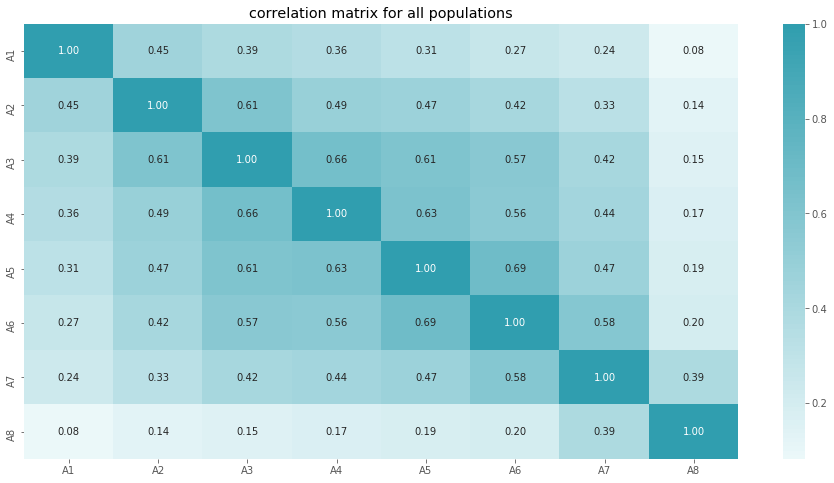

In [11]:
sns.heatmap(allpops.corr(), annot=True, fmt=".2f", cmap = sns.light_palette((210, 90, 60), input="husl", n_colors=100))#sns.color_palette("GnBu_d", n_colors=100)
plt.title('correlation matrix for all populations')
plt.savefig('plots/correlation matrix for all populations')


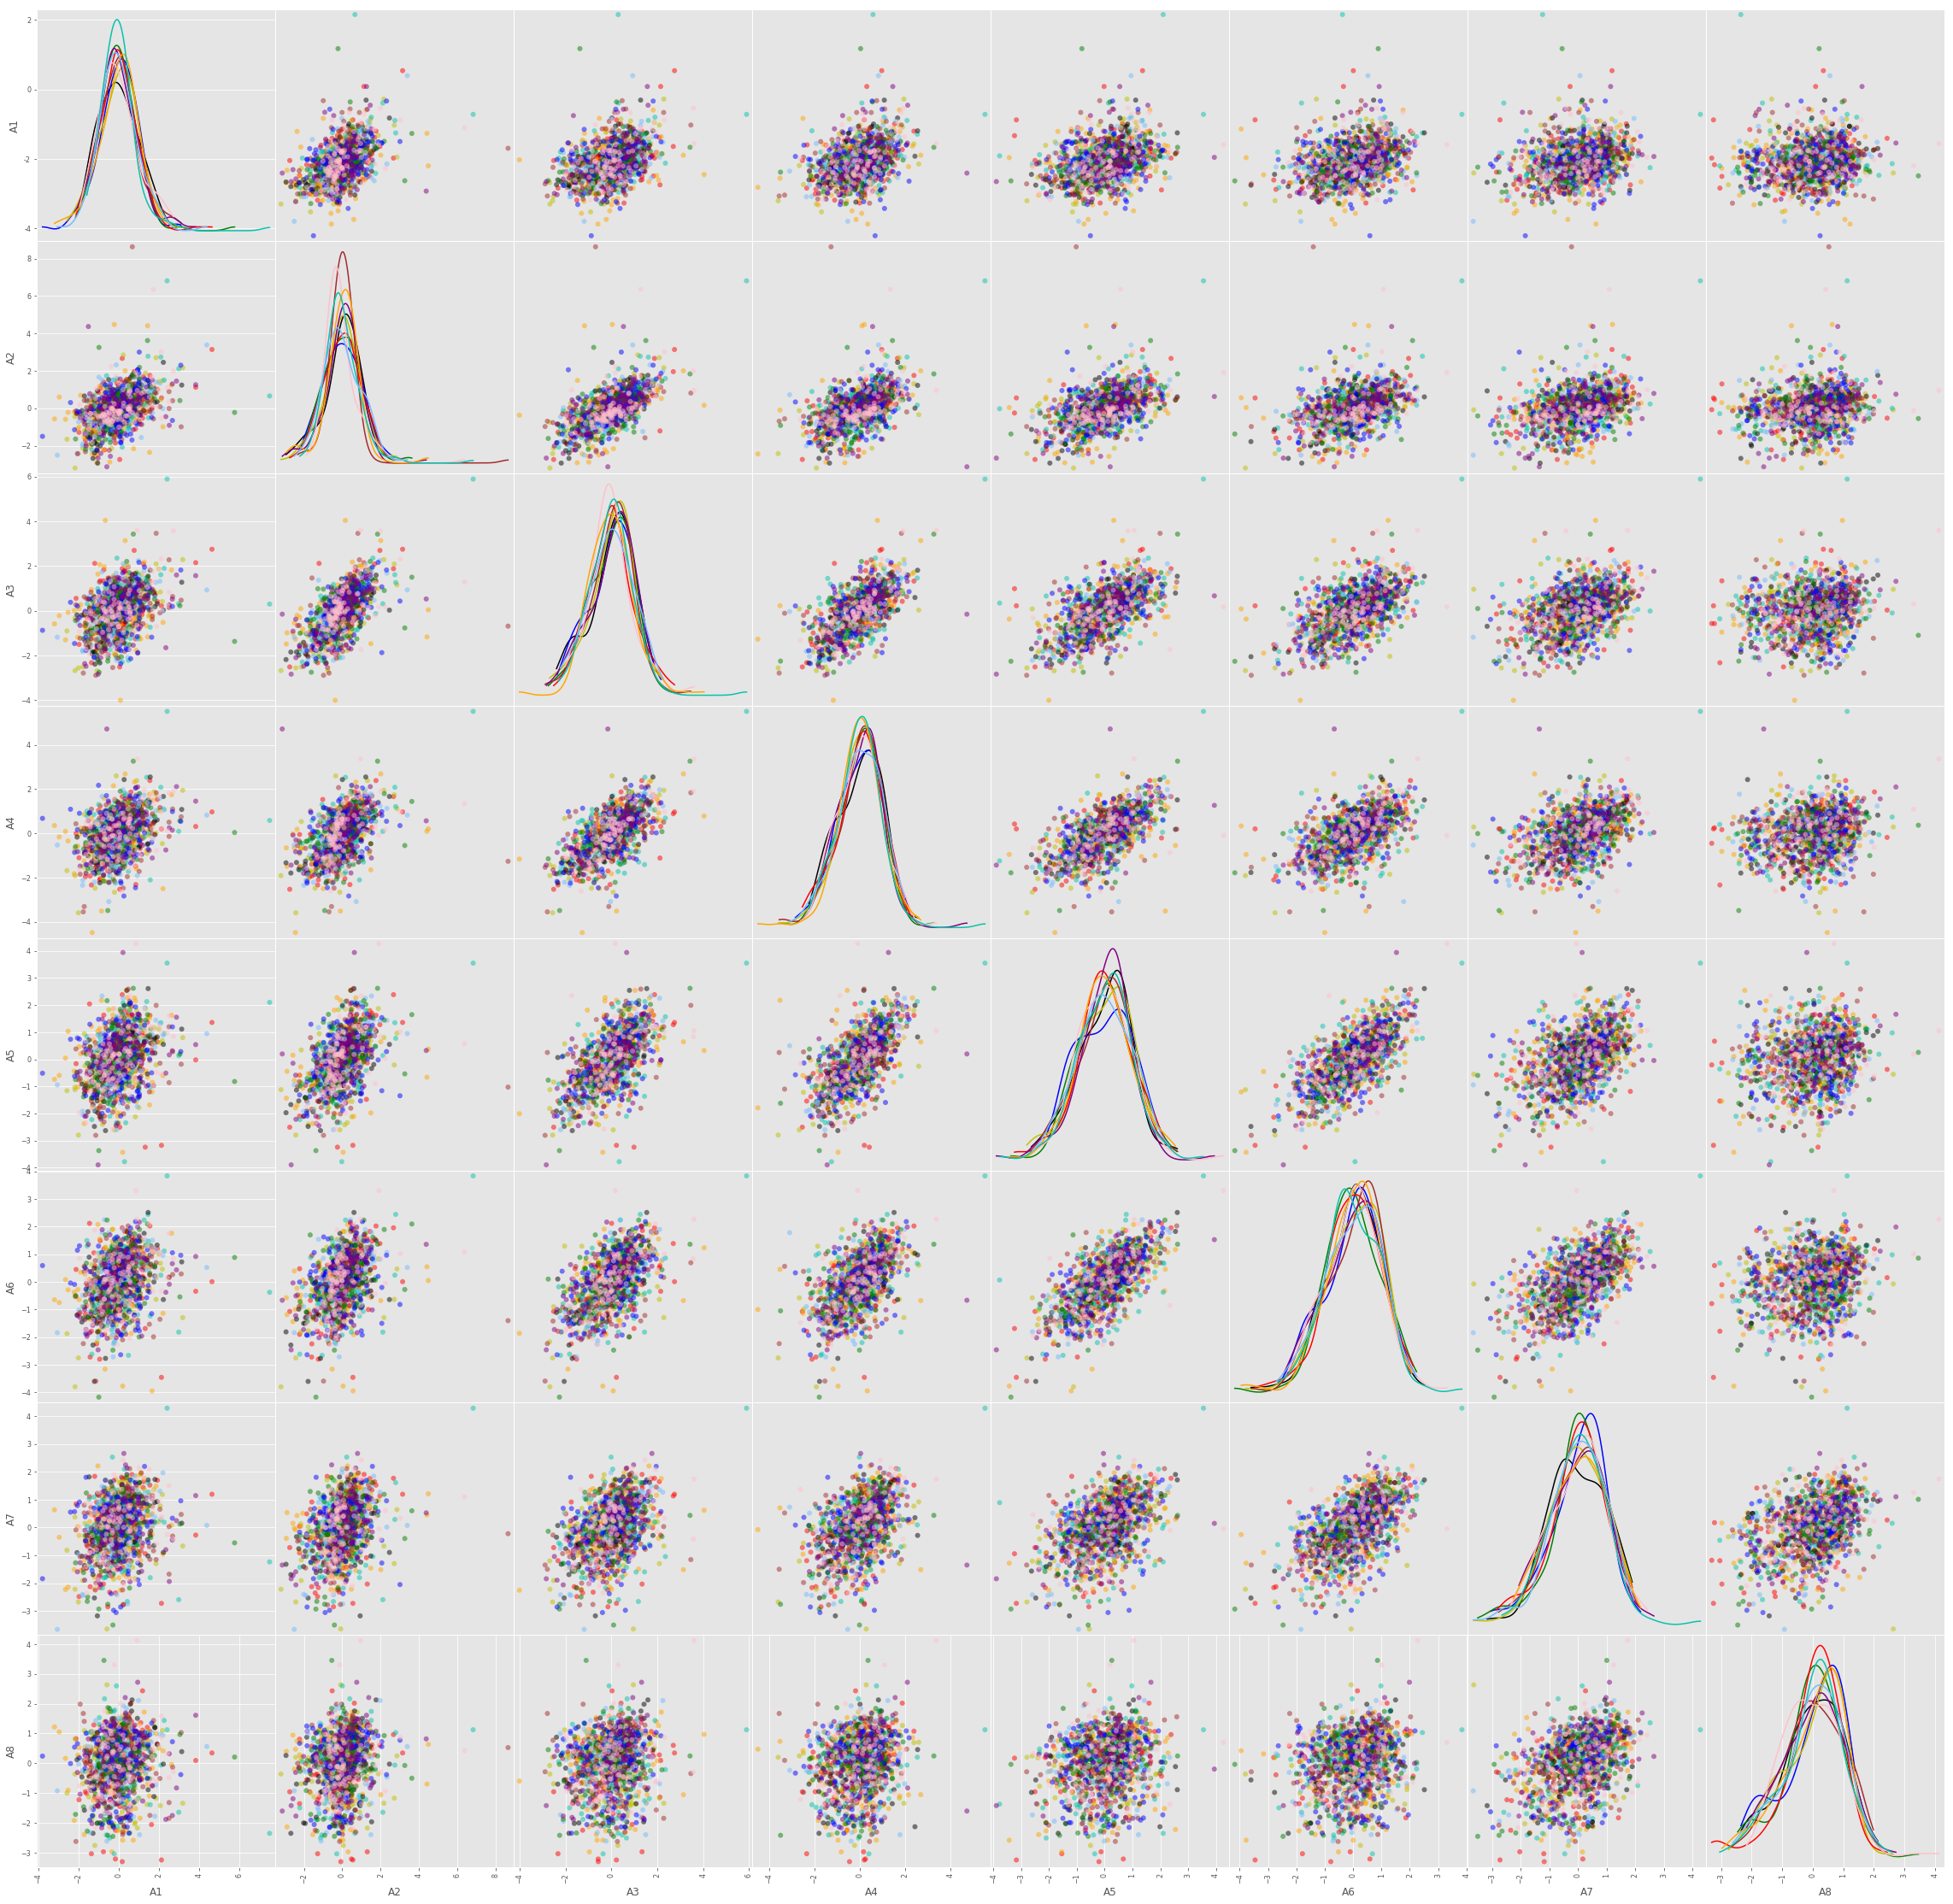

In [12]:
from prettyplot import *
color = ['black', 'blue', 'green', 'y', 'red', 'brown', 'purple', 'pink', 'orange', '#06c2ac', '#75bbfd', 'grey']
axarr, color_map = factor_scatter_matrix(allpops,'species', color)
plt.savefig('plots/scatterplotmatrix')


# Making covariance matrices for all populations (P matrices) 
### By the Cheverud conjecture, we can asssume P and G matrices are similar and possibly interchangable

In [13]:
#a =sns.pairplot(allpops, hue='species', diag_kind="kde", plot_kws=dict(s=10),palette= sns.hls_palette(8, l=.3, s=.8))
#a.set(xticklabels=[])
#a.set(yticklabels=[])

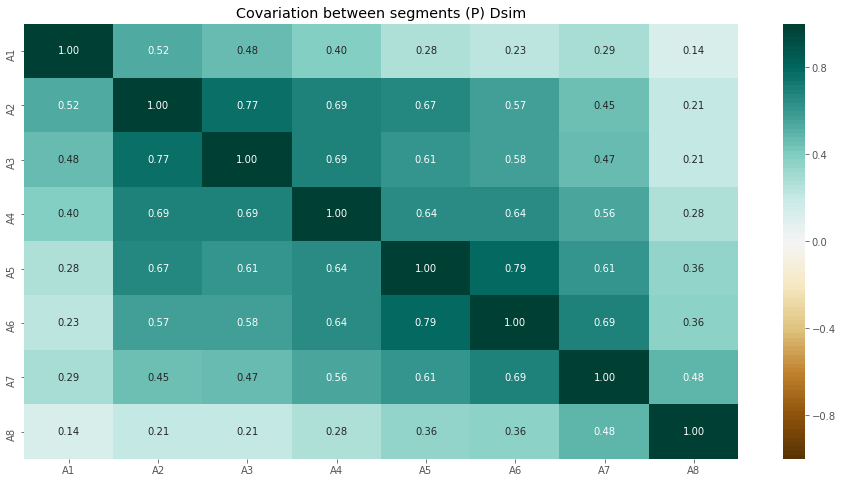

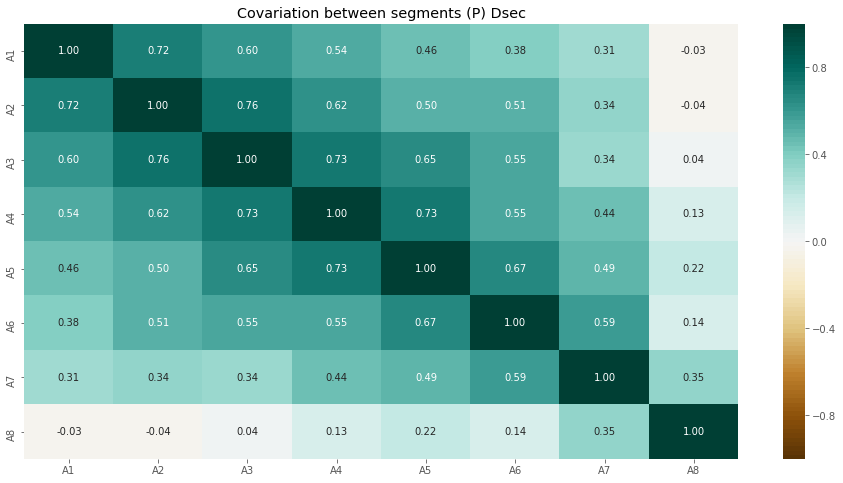

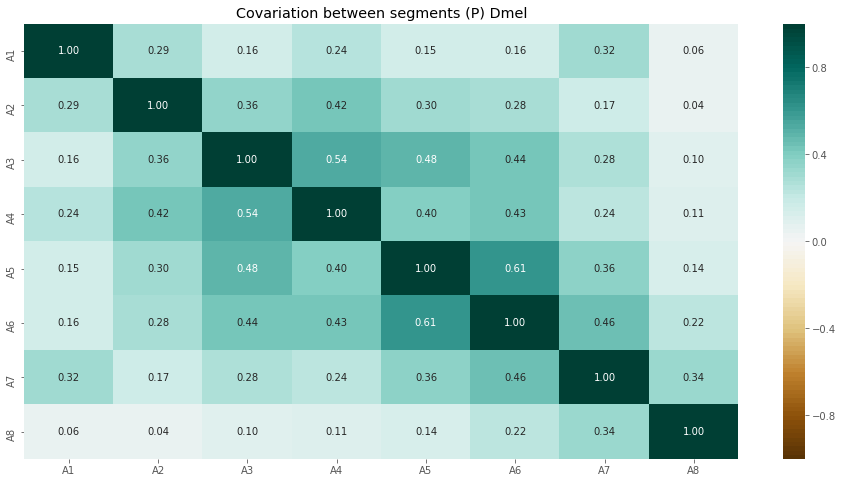

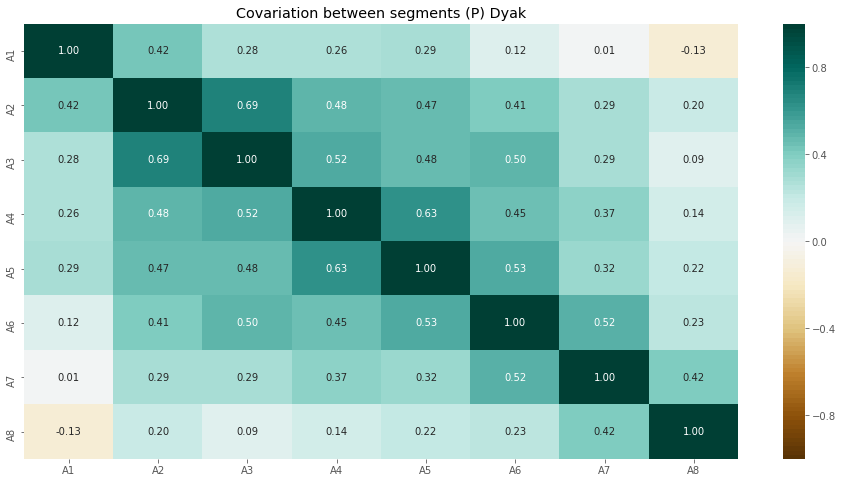

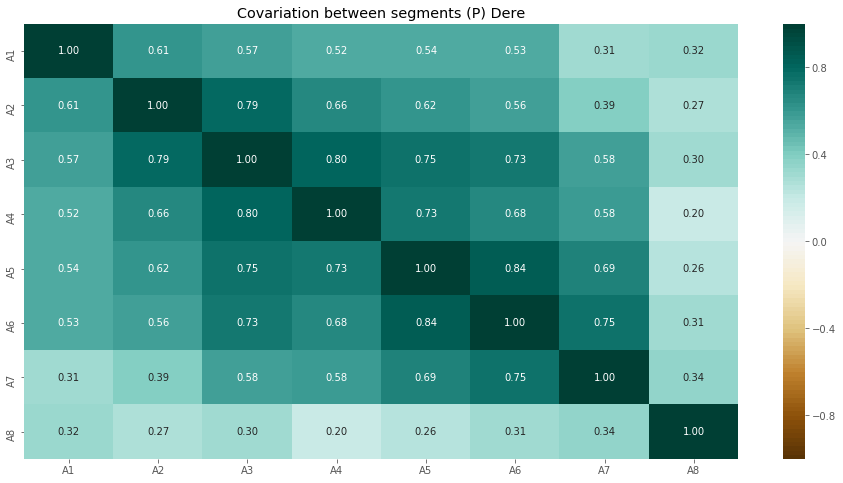

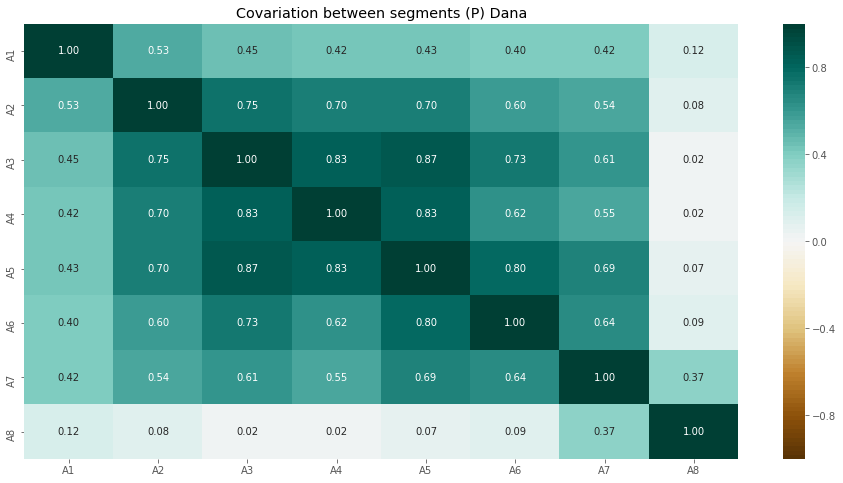

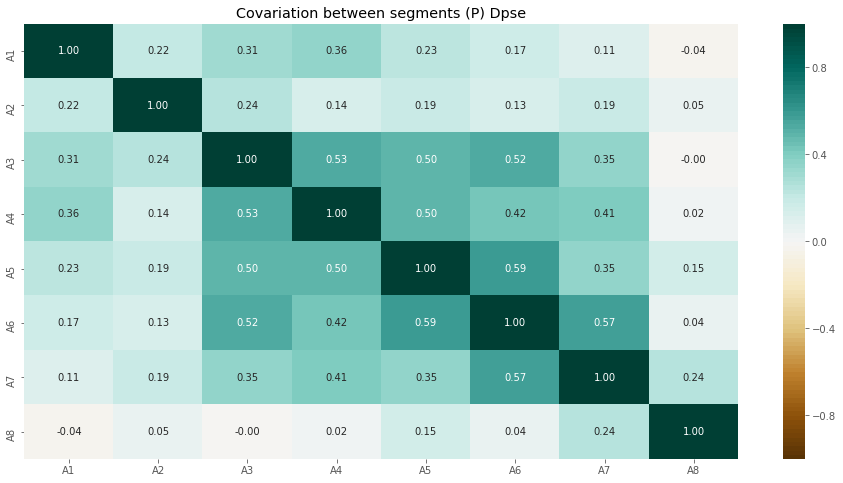

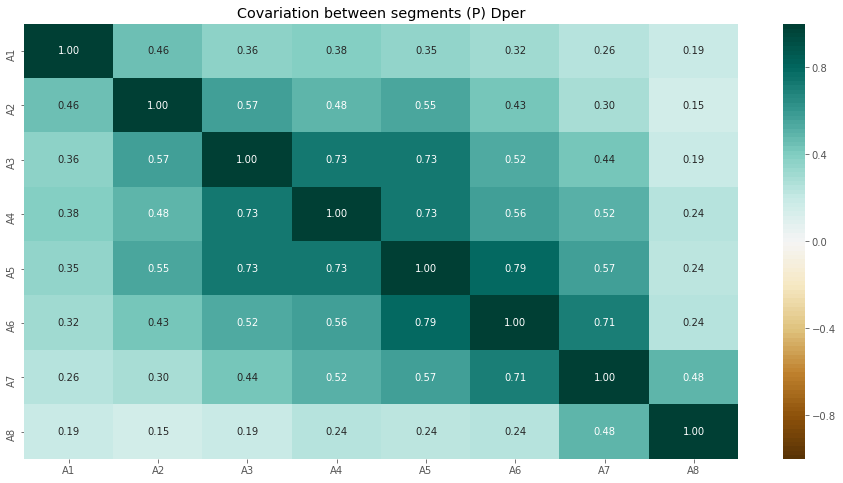

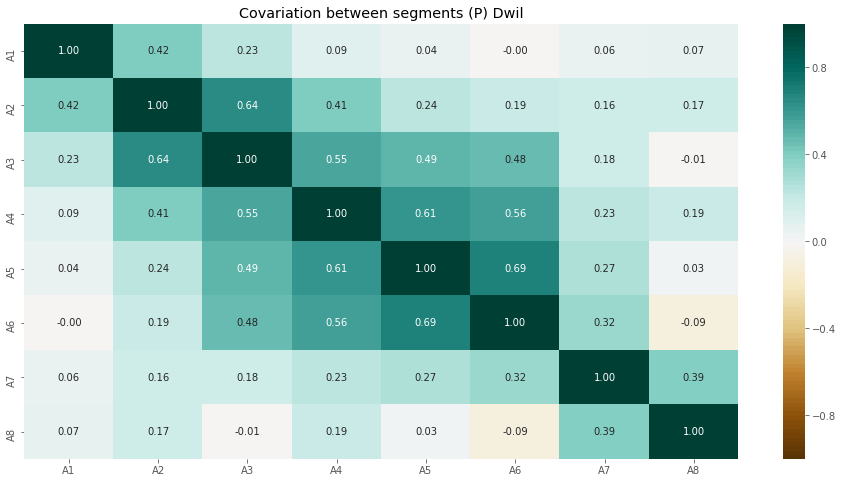

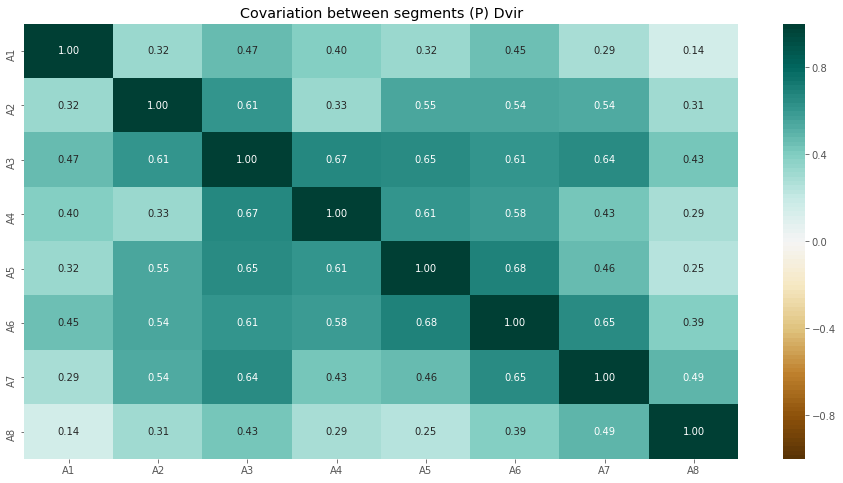

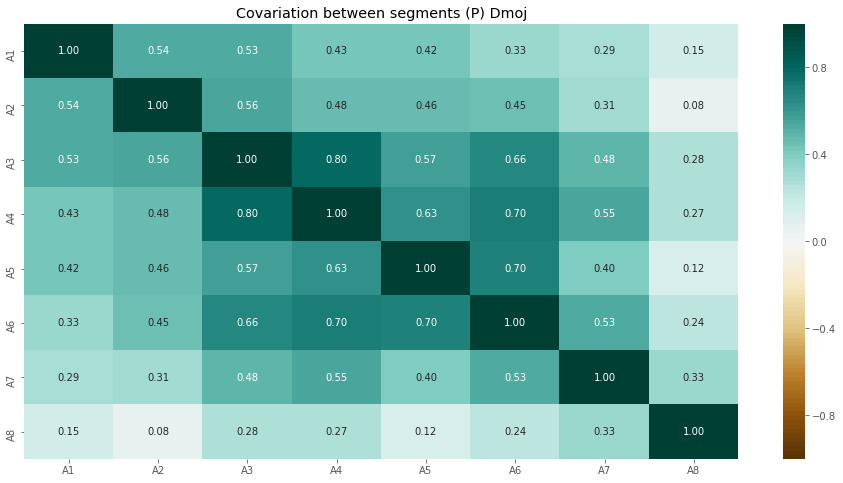

In [14]:
PmatrixAllSpe = {}
for i in species_list:
    sns.heatmap(newpop[i].cov(), annot=True, fmt=".2f",vmin = -1, vmax = 1, cmap=sns.color_palette("BrBG", n_colors=100))
    PmatrixAllSpe[i] = newpop[i].cov()
    plt.title('Covariation between segments (P) '+ i)
    plt.savefig('plots/Covariation between segments '+ i)
    plt.show()
    



In [15]:
PmatrixAllSpe['Dana']*MeanPheVectorAllSpe['Dana']

A1            A2            A3            A4            A5  \
A1  10047.119626  11221.651861   9397.707926   8743.844682   9039.323453   
A2   5366.126857  21010.550374  15854.867065  14502.391957  14823.924043   
A3   4495.354781  15859.901660  21003.880748  17233.018688  18438.663530   
A4   4244.237295  14720.844225  17487.050019  20698.761028  17462.368776   
A5   4297.347289  14737.491317  18325.335544  17102.927643  21133.773458   
A6   4050.273009  12511.185237  15343.850930  12926.558095  16891.669390   
A7   4217.357705  11394.085817  12755.262697  11319.303483  14615.091740   
A8   1225.490239   1718.343128    481.412541    472.623365   1542.825037   

              A6            A7            A8  
A1   8442.598166   9092.911193   2352.352413  
A2  12470.803027  11747.518610   1577.271889  
A3  15299.182356  13155.093769    442.030216  
A4  13078.921896  11846.210294    440.357035  
A5  16738.977262  14980.578427   1407.906235  
A6  20942.734860  13900.196600   1703.226149  
A7  13438.483202  21662.275981   7154.204589  
A8   1849.573560   8035.841057  19285.642056

# infering  expected ancestral phenotypes

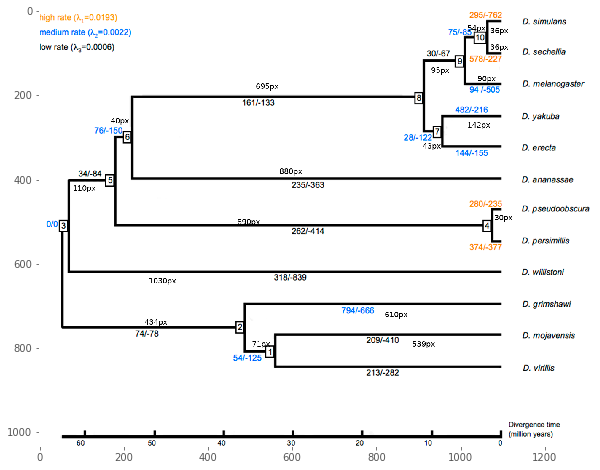

In [16]:
plt.imshow(misc.imread("tree.png"))
plt.grid(False)

### Ancestral Drosophila names

####     SiSe                                                                       1
####     SiSe)Me                                                               2
####     YaEr                                                                       3
####     SiSe)Me)YaEr                                                     4 
####     SiSe)Me)YaEr)An                                               5
####     PsPe                                                                      6   
####     SiSe)Me)YaEr)An)PsPe                                    7 
####     SiSe)Me)YaEr)An)PsPe)Wi                              8
####     ViMo                                                                       9
####     SiSe)Me)YaEr)An)PsPe)Wi)ViMo                  11


In [17]:
MeanPheVectorAncestral = {}
MeanPheVectorAncestral['SiSe'] = (MeanPheVectorAllSpe['Dsim'] + MeanPheVectorAllSpe['Dsec'])/2
MeanPheVectorAncestral['SiSe)Me'] = ((1/54)*MeanPheVectorAncestral['SiSe'] + (1/90)*MeanPheVectorAllSpe['Dmel'])/(1/54+1/90)
MeanPheVectorAncestral['YaEr'] = (MeanPheVectorAllSpe['Dyak'] + MeanPheVectorAllSpe['Dere'])/2
MeanPheVectorAncestral['SiSe)Me)YaEr'] = ((1/95)*MeanPheVectorAncestral['SiSe)Me'] + (1/43)*MeanPheVectorAncestral['YaEr'])/(1/95+1/43)
MeanPheVectorAncestral['SiSe)Me)YaEr)An'] = ((1/695)*MeanPheVectorAncestral['SiSe)Me)YaEr'] + (1/880)*MeanPheVectorAllSpe['Dana'])/(1/695+1/880)
MeanPheVectorAncestral['PsPe'] = (MeanPheVectorAllSpe['Dpse'] + MeanPheVectorAllSpe['Dper'])/2
MeanPheVectorAncestral['SiSe)Me)YaEr)An)PsPe'] = ((1/40)*MeanPheVectorAncestral['SiSe)Me)YaEr)An'] + (1/890)*MeanPheVectorAncestral['PsPe'])/(1/40+1/890)
MeanPheVectorAncestral['SiSe)Me)YaEr)An)PsPe)Wi'] = ((1/110)*MeanPheVectorAncestral['SiSe)Me)YaEr)An)PsPe'] + (1/1030)*MeanPheVectorAllSpe['Dwil'])/(1/110+ 1/1030)
MeanPheVectorAncestral['ViMo'] = (MeanPheVectorAllSpe['Dvir'] + MeanPheVectorAllSpe['Dmoj'])/2
MeanPheVectorAncestral['SiSe)Me)YaEr)An)PsPe)Wi)ViMo'] = ((1/4)*MeanPheVectorAncestral['SiSe)Me)YaEr)An)PsPe)Wi'] + (1/434)*MeanPheVectorAncestral['ViMo'])/(1/434+1/4)




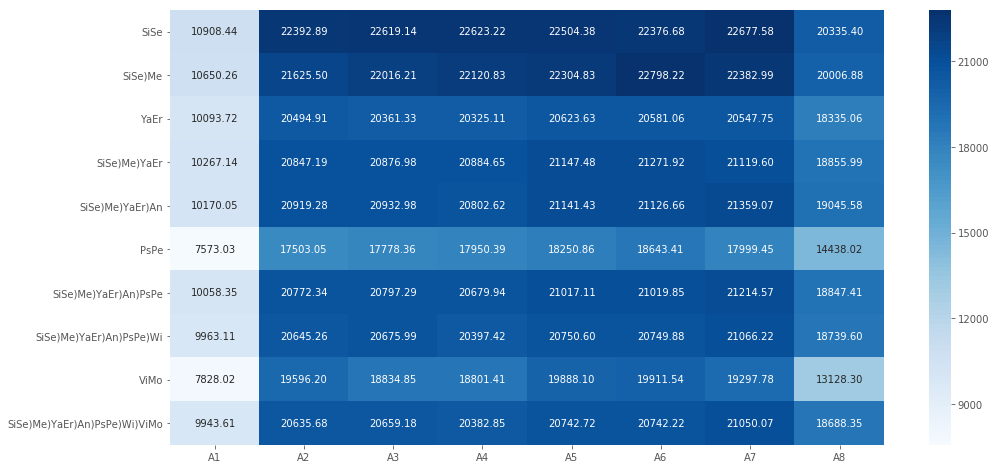

In [18]:

ancestral_spe_list = ["SiSe","SiSe)Me","YaEr","SiSe)Me)YaEr","SiSe)Me)YaEr)An", "PsPe","SiSe)Me)YaEr)An)PsPe","SiSe)Me)YaEr)An)PsPe)Wi", 
                      "ViMo","SiSe)Me)YaEr)An)PsPe)Wi)ViMo"]

MeanPheAncestralDF = pd.DataFrame.from_dict(MeanPheVectorAncestral, orient='index').reindex(ancestral_spe_list)



sns.heatmap( MeanPheAncestralDF,annot=True, fmt=".2f",
               cmap=sns.color_palette("Blues", n_colors=100))    
plt.savefig('plots/clustermap average phenotpe ancestrals')

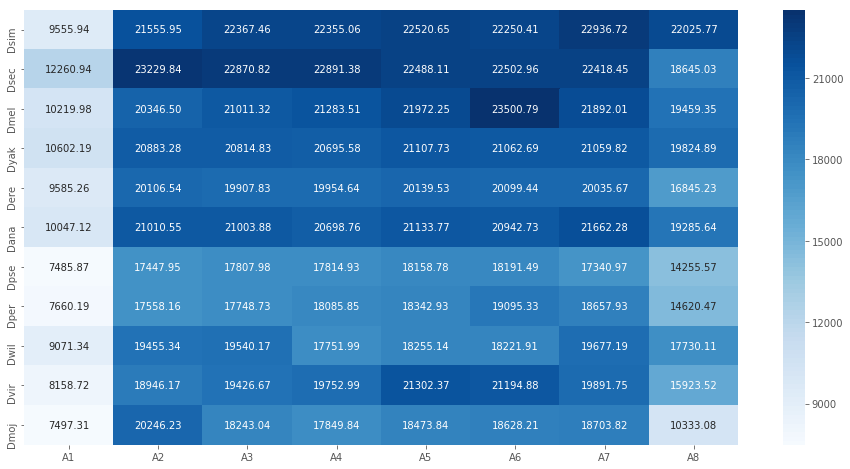

In [19]:
MeanPheAllspeDF = pd.DataFrame.from_dict(MeanPheVectorAllSpe, orient='index').reindex(species_list)
sns.heatmap( MeanPheAllspeDF, annot=True, fmt=".2f",
               cmap=sns.color_palette("Blues", n_colors=100))
plt.savefig('plots/clustermap average phenotype')


# calculating the delta Z for all populations

In [20]:
DeltaZ = {}
DeltaZ['A->Dsec'] = MeanPheVectorAllSpe['Dsec'] - MeanPheVectorAncestral['SiSe']
DeltaZ['A->Dsim'] = MeanPheVectorAllSpe['Dsim'] - MeanPheVectorAncestral['SiSe']
DeltaZ['A->Dpse'] = MeanPheVectorAllSpe['Dpse'] - MeanPheVectorAncestral['PsPe']
DeltaZ['A->Dper'] = MeanPheVectorAllSpe['Dper'] - MeanPheVectorAncestral['PsPe']
DeltaZ['A->Dmel'] = MeanPheVectorAllSpe['Dmel'] - MeanPheVectorAncestral['SiSe)Me']
DeltaZ['A->Dyak'] = MeanPheVectorAllSpe['Dyak'] - MeanPheVectorAncestral['YaEr']
DeltaZ['A->Dere'] = MeanPheVectorAllSpe['Dere'] - MeanPheVectorAncestral['YaEr']
DeltaZ['A->Dmoj'] = MeanPheVectorAllSpe['Dmoj'] - MeanPheVectorAncestral['ViMo']
DeltaZ['A->Dvir'] = MeanPheVectorAllSpe['Dvir'] - MeanPheVectorAncestral['ViMo']
DeltaZ['A->Dwil'] = MeanPheVectorAllSpe['Dwil'] - MeanPheVectorAncestral['SiSe)Me)YaEr)An)PsPe)Wi']
DeltaZ['A->Dana'] = MeanPheVectorAllSpe['Dana'] - MeanPheVectorAncestral['SiSe)Me)YaEr)An']


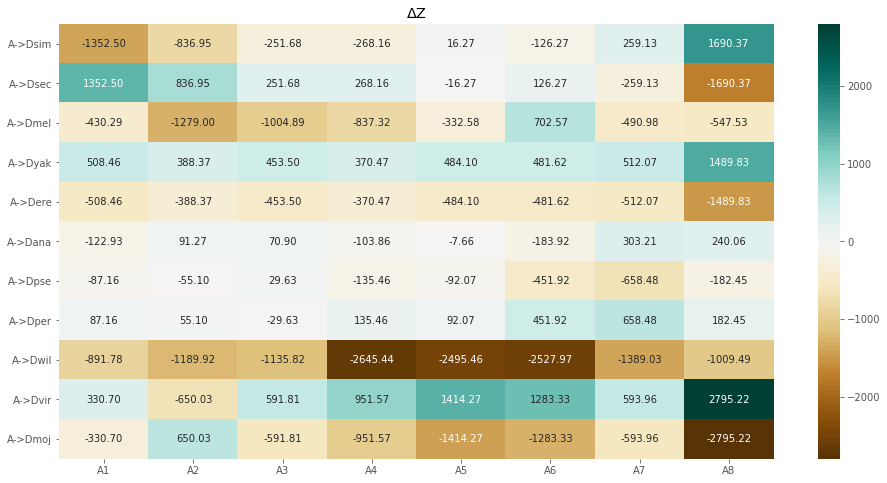

In [21]:
DeltaZDF = pd.DataFrame.from_dict(DeltaZ, orient='index').reindex(['A->' + i for i in species_list])
sns.heatmap( DeltaZDF, annot=True, fmt=".2f",
               cmap=sns.color_palette("BrBG", n_colors=100))
plt.title(r'$\Delta$Z')
plt.savefig('plots/deltaZ heatmap')

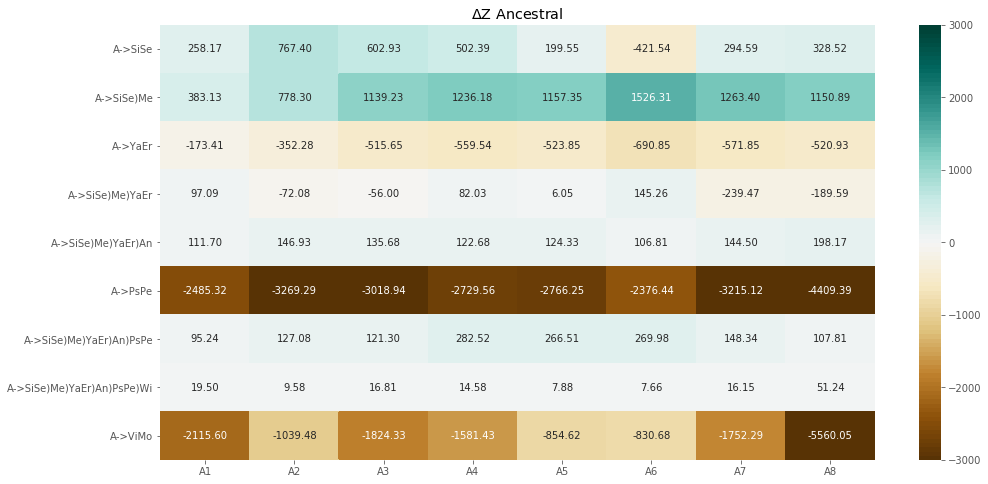

In [22]:
DeltaZA = {}
DeltaZA['A->SiSe'] = MeanPheVectorAncestral['SiSe'] - MeanPheVectorAncestral['SiSe)Me']
DeltaZA['A->SiSe)Me'] = MeanPheVectorAncestral['SiSe)Me'] - MeanPheVectorAncestral['SiSe)Me)YaEr']
DeltaZA['A->YaEr'] = MeanPheVectorAncestral['YaEr'] - MeanPheVectorAncestral['SiSe)Me)YaEr']
DeltaZA['A->SiSe)Me)YaEr'] = MeanPheVectorAncestral['SiSe)Me)YaEr'] - MeanPheVectorAncestral['SiSe)Me)YaEr)An']
DeltaZA['A->SiSe)Me)YaEr)An'] = MeanPheVectorAncestral['SiSe)Me)YaEr)An'] - MeanPheVectorAncestral['SiSe)Me)YaEr)An)PsPe']
DeltaZA['A->PsPe'] = MeanPheVectorAncestral['PsPe'] - MeanPheVectorAncestral['SiSe)Me)YaEr)An)PsPe']
DeltaZA['A->SiSe)Me)YaEr)An)PsPe'] = MeanPheVectorAncestral['SiSe)Me)YaEr)An)PsPe'] - MeanPheVectorAncestral['SiSe)Me)YaEr)An)PsPe)Wi']
DeltaZA['A->SiSe)Me)YaEr)An)PsPe)Wi'] = MeanPheVectorAncestral['SiSe)Me)YaEr)An)PsPe)Wi'] - MeanPheVectorAncestral['SiSe)Me)YaEr)An)PsPe)Wi)ViMo']
DeltaZA['A->ViMo'] = MeanPheVectorAncestral['ViMo'] - MeanPheVectorAncestral['SiSe)Me)YaEr)An)PsPe)Wi)ViMo']

DeltaZAncDF = pd.DataFrame.from_dict(DeltaZA, orient='index').reindex(['A->' + i for i in ancestral_spe_list][:-1])
sns.heatmap( DeltaZAncDF, annot=True, fmt=".2f", vmax = 3000, vmin = -3000,
               cmap=sns.color_palette("BrBG", n_colors=100))
plt.title(r'$\Delta$Z Ancestral')
plt.savefig('plots/deltaZ Ancestral heatmap')

# calculating ancestral P matrices



In [23]:
MeanPheVectorAllSpe['Dmoj']

A1     7497.313273
A2    20246.229727
A3    18243.036182
A4    17849.840182
A5    18473.836091
A6    18628.210091
A7    18703.822091
A8    10333.077273
dtype: float64

In [24]:
MeanPheVectorAllSpe['Dana']

A1    10047.119626
A2    21010.550374
A3    21003.880748
A4    20698.761028
A5    21133.773458
A6    20942.734860
A7    21662.275981
A8    19285.642056
dtype: float64

# calculating PCs and components for every population

In [25]:
from sklearn.decomposition import PCA as sklearnPCA

class PCana:
    def __init__(self, segmentsDF):
        sklearn_pca = sklearnPCA(n_components=4)
        self.PCvalues = sklearn_pca.fit_transform(segmentsDF.values)
        self.varEXP = sklearn_pca.explained_variance_ratio_
        self.PCAComp = sklearn_pca.components_
        
        
PCAAllSpe = {}
for i in species_list:
    PCAAllSpe[i] = PCana(newpop2[i].iloc[:, :-1])

In [26]:
Amatrix = np.hstack((PCAAllSpe[species_list[0]].PCAComp[:3],np.asmatrix(PCAAllSpe[species_list[0]].varEXP[:3]).T))

for spe in species_list[1:]:
    temp = np.hstack((PCAAllSpe[spe].PCAComp[:3],np.asmatrix(PCAAllSpe[spe].varEXP[:3]).T))
    Amatrix = np.vstack((Amatrix, temp))
    
PCACompPd = pd.DataFrame(Amatrix, columns=['A'+ str(i) for i in range(1,9)] + ['Explained variance'], index = ['PC'+ str(i)+' ' +spe for spe in species_list for i in range(1,4)])
PCACompPd.head()

A1        A2        A3        A4        A5        A6  \
PC1 Dsim -0.245451 -0.390856 -0.385090 -0.393127 -0.398792 -0.390922   
PC2 Dsim  0.504661  0.316021  0.295837  0.105465 -0.139986 -0.242336   
PC3 Dsim -0.652180  0.043401  0.076795  0.128434  0.271481  0.302178   
PC1 Dsec -0.347215 -0.388635 -0.409451 -0.409116 -0.399032 -0.369972   
PC2 Dsec  0.313134  0.310018  0.204286  0.026422 -0.150850 -0.181789   

                A7        A8  Explained variance  
PC1 Dsim -0.355259 -0.214658            0.569764  
PC2 Dsim -0.357138 -0.583896            0.142620  
PC3 Dsim -0.088519 -0.614440            0.097500  
PC1 Dsec -0.300219 -0.084505            0.542936  
PC2 Dsec -0.454284 -0.707974            0.165200

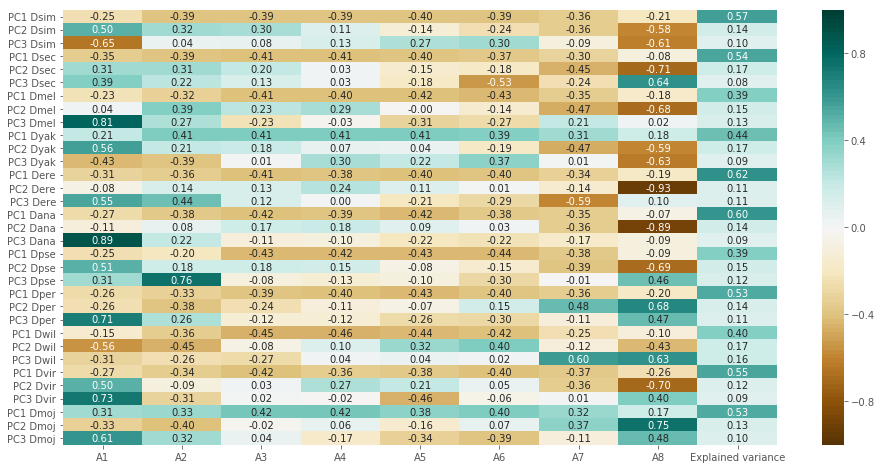

In [27]:
sns.heatmap(PCACompPd, annot=True, fmt=".2f",vmin = -1, vmax = 1, cmap=sns.color_palette("BrBG", n_colors=100))
plt.savefig('plots/PCs heatmap')

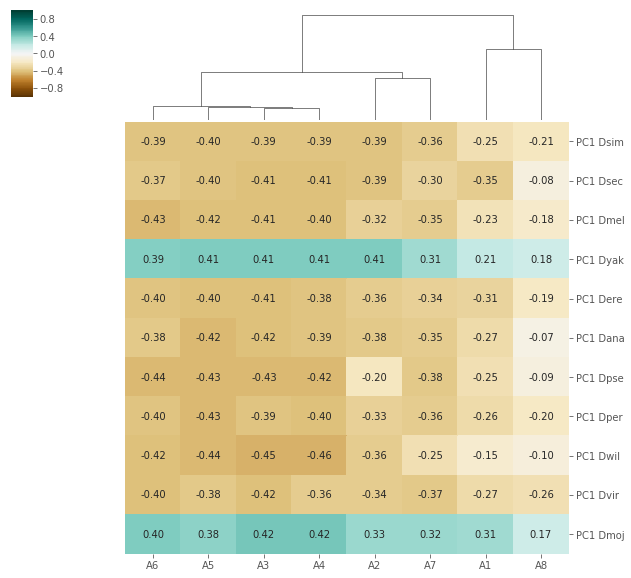

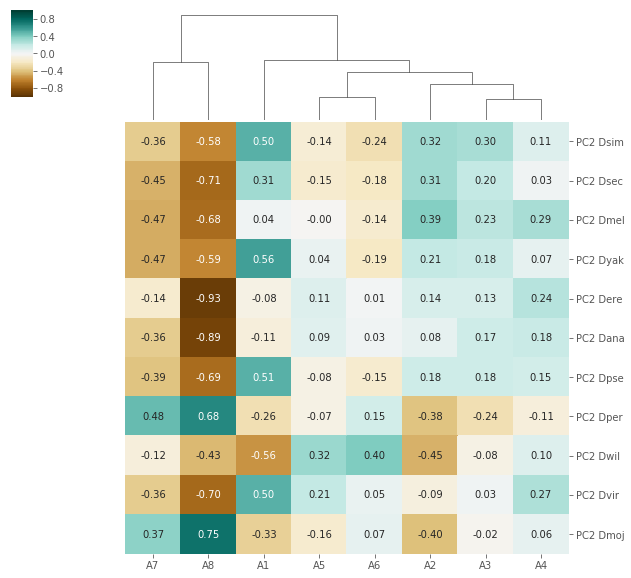

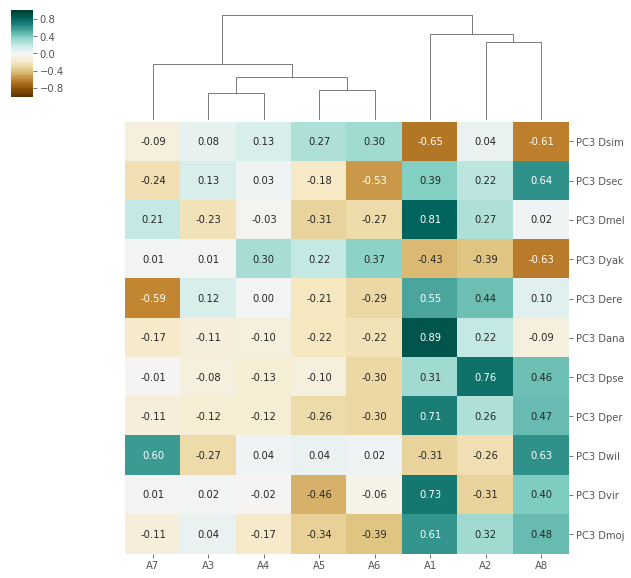

In [28]:
for i in [0,1,2]:
    sns.clustermap(PCACompPd.iloc[i::3, :-1] , annot=True, fmt=".2f",vmin = -1, vmax = 1,row_cluster = False, cmap=sns.color_palette("BrBG", n_colors=100), figsize=(10, 10))
    plt.savefig('plots/clustermap for PC'+ str(i)+'.png')